In [1]:
import pandas as pd
jsondf = pd.read_json("dim_customer.json")

df = pd.read_csv("fct_invoice.csv")

df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


# Easy

1. How many unique customers are in the dataset?

In [2]:
print(df["customer_id"].nunique())

5191


2. What are the different categories of products available? How many unique categories are there?

In [3]:
categories = df["category"].unique()
nCategories = df["category"].nunique()

print("Available categories: ",categories)
print("Number of unique categories: ",nCategories)

Available categories:  ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
Number of unique categories:  8


3. Which payment method is the most popular? How many times was it used?

In [4]:
popularMethod = df['payment_method'].value_counts().idxmax()
popularCount = df["payment_method"].value_counts().max()

print("Most popular payment method: ", popularMethod)
print("Times used: ", popularCount)

Most popular payment method:  Cash
Times used:  44447


# Medium

1. What are the three most popular categories, by total sales?

In [5]:
df['sales'] = df['quantity']*df['price']
df.groupby('category').sum()["sales"].sort_values(ascending=False).head(3)

C:\Users\migue\AppData\Local\Temp\ipykernel_22016\2089846056.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('category').sum()["sales"].sort_values(ascending=False).head(3)


category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sales, dtype: float64

2. What are the total sales attributed to customers over the age of 45?

In [6]:
df1 = df.rename(columns={'customer_id': 'id'}).copy()

mergeddf = pd.merge(df1, jsondf, on = ['id'], how = 'left')
mergeddf[mergeddf["age"] > 45.0].sum()['sales']

82039768.15

3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

C:\Users\migue\AppData\Local\Temp\ipykernel_22016\962124844.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  graphData = mergeddf.groupby("monthYear").sum()['sales'].sort_index()


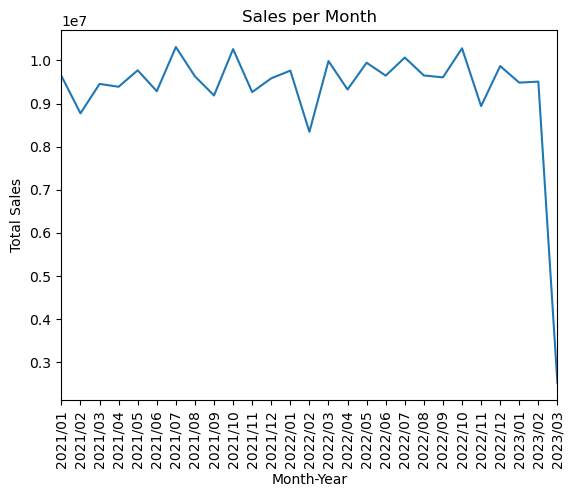

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

def dateExtract(date):
    year = date[-4:]
    month = date[date.find("/")+1:date.find("/",date.find("/")+1)]
    if len(month) == 1:
        month = "0" + str(month)
    monthYear = (year+"/"+month)
    return monthYear

mergeddf["monthYear"] = mergeddf["invoice_date"].apply(dateExtract)
graphData = mergeddf.groupby("monthYear").sum()['sales'].sort_index()

plt.plot(graphData.index, graphData.values)
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.title("Sales per Month")
plt.xticks(rotation = 90)
plt.xlim(graphData.index[0], graphData.index[-1])

plt.show()

As shown in the graph, sales are generally steady throughout the year, but have massive drops in the month of February and smaller drops in September. Nevertheless, they stabilize in the succeeding months of March and October. Furthermore, it is interesting to note that sales do not peak in December considering that December is the peak of Christmas season.

# Hard

1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [14]:
pd.set_option('display.max_rows', None)
def age_Range(age):
    ageBracket = ''
    if age < 20:
        ageBracket = '10-19'
    elif age < 30:
        ageBracket = '20-29'
    elif age < 40:
        ageBracket = '30-39'
    elif age < 50:
        ageBracket = '40-49'
    elif age < 60:
        ageBracket = '50-59'
    elif age < 70:
        ageBracket = '60-69'
    elif age < 80:
        ageBracket = '70-79'
    elif age < 90:
        ageBracket = '80-89'
    return ageBracket
        
mergeddf['ageRange'] = mergeddf['age'].apply(age_Range)
#data = mergeddf.groupby(['category','ageRange']).sum()['sales']

pivot_table = pd.pivot_table(data, values='sales', index='category', columns='ageRange', aggfunc=sum)

C:\Users\migue\AppData\Local\Temp\ipykernel_22016\748559579.py:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = mergeddf.groupby(['category','ageRange']).sum()['sales']


KeyError: 'sales'